<b><font size="6" color = 'green'>Handwritten Digits Recognition</font></b>

This is a mini project that shows that how system use the given data set to choose the most probable form of pixels to determine 
the handwritten digits using <b><font size="4">KNN Algorithm</font></b>..

In [11]:
# Importing Required Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b><font size="4">Reading Data</font></b>

In [12]:
df = pd.read_csv('train.csv')

# Converting into numpy ndarrays.
data = df.values
print(data.shape)

(42000, 785)


In [13]:
df.head(4)               # The whole data consists of 42000 - 784(28 x 28px) images where each pixel is defined

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# slicing dataset to 8000 rows so that the program will run a bit faster(You can skip steps in the cell).

X = data[ :8000, 1: ]
Y = data[ :8000, 0]
print(X.shape)
print(Y.shape)

(8000, 784)
(8000,)


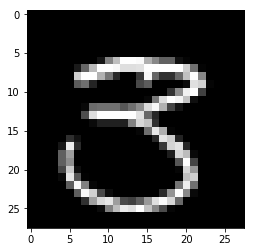

In [16]:
# Checking that the image is displayed or not.

plt.imshow((X[7].reshape(28, 28)), cmap = 'gray')        # imshow is function to open the image
plt.show()       

<font size="4"><b>Implementing Algorithm(KNN)</b></font>

In [18]:
# find dist. of query points from other Points.
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))


# K is the hyperparameter here as it is Supervised ML Alogorithm.
def knn(X, Y, queryPoint, k = 5):
    vals = []                         # list of tuples
    
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    vals = sorted(vals)
    vals = vals[ :k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)
    #print(type(new_vals))
    #print(new_vals)
    index = new_vals[1].argmax()
    final_prediction = new_vals[1].argmax()
    #print(final_prediction)
    return new_vals[0][index]

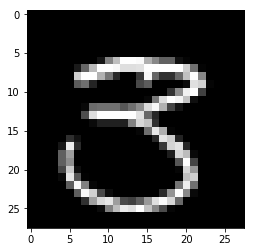

3


In [25]:
testX = X[7]                # Getting Image to check the program(Enter any number b/w 0 to 7999 in [_] as the array is sliced above).
plt.imshow((testX.reshape(28, 28)), cmap = 'gray')
plt.show()
pred = knn(X, Y, testX, k = 11)
print(int(pred))